In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
for col in ['Time','Amount']:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = (df[col] - mean) / std


In [3]:
def convertOneHotToBinary(arr):
    temp = []
    for row in arr:
        if(row[0] > row[1]):
            temp.append(0)
        else:
            temp.append(1)
    return temp

In [4]:
def printF1Scores(prec_0, recall_0, f1_0, prec_1, recall_1, f1_1):
    print("\nclass 0")
    print("Precision: ", prec_0)
    print("Recall: ", recall_0)
    print("F1-Score: ", f1_0)

    print("\nclass 1")
    print("Precision: ", prec_1)
    print("Recall: ", recall_1)
    print("F1-Score: ", f1_1)

    print("\nAverage")
    print("Precision: ", (prec_0 + prec_1)/2)
    print("Recall: ", (recall_0 + recall_1)/2)
    print("F1-Score: ", (f1_0 + f1_1)/2)

In [5]:
data = df.values
X = df.drop('Class',axis = 1)
Y = df['Class']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=101) 
X_train = X_train.values
X_validation = X_test.values
y_train = pd.get_dummies(y_train).values
y_validation = pd.get_dummies(y_test).values

In [8]:
import tensorflow as tf
from  tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

In [9]:
inputs = Input(shape=(30,))

In [10]:
x = keras.layers.Dense(
    32, kernel_initializer='he_uniform')(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.LeakyReLU()(x)

x = keras.layers.Dense(
    32, kernel_initializer='he_uniform')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.LeakyReLU()(x)

In [11]:
outputs = keras.layers.Dense(2, activation='softmax')(x)

In [12]:
model = keras.models.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.Adam(
    10**-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, validation_data = (X_validation, y_validation),
                    batch_size=128, epochs=256)

Train on 1120 samples, validate on 280 samples
Epoch 1/256
1120/1120 [==============================] - 2s 1ms/sample - loss: 0.9799 - accuracy: 0.3446 - val_loss: 1.0375 - val_accuracy: 0.5179
Epoch 2/256
1120/1120 [==============================] - 0s 62us/sample - loss: 0.9658 - accuracy: 0.3562 - val_loss: 0.9630 - val_accuracy: 0.5321
Epoch 3/256
1120/1120 [==============================] - 0s 52us/sample - loss: 0.9573 - accuracy: 0.3473 - val_loss: 0.9239 - val_accuracy: 0.5321
Epoch 4/256
1120/1120 [==============================] - 0s 52us/sample - loss: 0.9547 - accuracy: 0.3616 - val_loss: 0.9018 - val_accuracy: 0.5321
Epoch 5/256
1120/1120 [==============================] - 0s 49us/sample - loss: 0.9405 - accuracy: 0.3616 - val_loss: 0.8872 - val_accuracy: 0.5286
Epoch 6/256
1120/1120 [==============================] - 0s 53us/sample - loss: 0.9320 - accuracy: 0.3821 - val_loss: 0.8775 - val_accuracy: 0.5286
Epoch 7/256
1120/1120 [==============================] - 0s 53us/s

Epoch 56/256
1120/1120 [==============================] - 0s 52us/sample - loss: 0.7219 - accuracy: 0.5929 - val_loss: 0.7120 - val_accuracy: 0.6250
Epoch 57/256
1120/1120 [==============================] - 0s 52us/sample - loss: 0.7194 - accuracy: 0.5813 - val_loss: 0.7093 - val_accuracy: 0.6321
Epoch 58/256
1120/1120 [==============================] - 0s 51us/sample - loss: 0.7214 - accuracy: 0.6018 - val_loss: 0.7059 - val_accuracy: 0.6357
Epoch 59/256
1120/1120 [==============================] - 0s 49us/sample - loss: 0.7103 - accuracy: 0.6009 - val_loss: 0.7028 - val_accuracy: 0.6357
Epoch 60/256
1120/1120 [==============================] - 0s 51us/sample - loss: 0.7036 - accuracy: 0.6009 - val_loss: 0.7002 - val_accuracy: 0.6357
Epoch 61/256
1120/1120 [==============================] - 0s 50us/sample - loss: 0.7122 - accuracy: 0.6000 - val_loss: 0.6979 - val_accuracy: 0.6393
Epoch 62/256
1120/1120 [==============================] - 0s 51us/sample - loss: 0.7013 - accuracy: 0.6089

Epoch 111/256
1120/1120 [==============================] - 0s 52us/sample - loss: 0.5570 - accuracy: 0.7446 - val_loss: 0.5643 - val_accuracy: 0.7750
Epoch 112/256
1120/1120 [==============================] - 0s 54us/sample - loss: 0.5504 - accuracy: 0.7607 - val_loss: 0.5623 - val_accuracy: 0.7750
Epoch 113/256
1120/1120 [==============================] - 0s 54us/sample - loss: 0.5490 - accuracy: 0.7571 - val_loss: 0.5597 - val_accuracy: 0.7786
Epoch 114/256
1120/1120 [==============================] - 0s 53us/sample - loss: 0.5521 - accuracy: 0.7580 - val_loss: 0.5573 - val_accuracy: 0.7786
Epoch 115/256
1120/1120 [==============================] - 0s 54us/sample - loss: 0.5502 - accuracy: 0.7598 - val_loss: 0.5553 - val_accuracy: 0.7786
Epoch 116/256
1120/1120 [==============================] - 0s 52us/sample - loss: 0.5474 - accuracy: 0.7563 - val_loss: 0.5532 - val_accuracy: 0.7821
Epoch 117/256
1120/1120 [==============================] - 0s 51us/sample - loss: 0.5382 - accuracy:

1120/1120 [==============================] - 0s 54us/sample - loss: 0.4439 - accuracy: 0.8393 - val_loss: 0.4575 - val_accuracy: 0.8357
Epoch 166/256
1120/1120 [==============================] - 0s 55us/sample - loss: 0.4443 - accuracy: 0.8491 - val_loss: 0.4561 - val_accuracy: 0.8357
Epoch 167/256
1120/1120 [==============================] - 0s 54us/sample - loss: 0.4428 - accuracy: 0.8491 - val_loss: 0.4544 - val_accuracy: 0.8357
Epoch 168/256
1120/1120 [==============================] - 0s 54us/sample - loss: 0.4406 - accuracy: 0.8527 - val_loss: 0.4528 - val_accuracy: 0.8357
Epoch 169/256
1120/1120 [==============================] - 0s 53us/sample - loss: 0.4399 - accuracy: 0.8482 - val_loss: 0.4516 - val_accuracy: 0.8357
Epoch 170/256
1120/1120 [==============================] - 0s 53us/sample - loss: 0.4406 - accuracy: 0.8554 - val_loss: 0.4501 - val_accuracy: 0.8357
Epoch 171/256
1120/1120 [==============================] - 0s 54us/sample - loss: 0.4393 - accuracy: 0.8491 - val_

1120/1120 [==============================] - 0s 57us/sample - loss: 0.3646 - accuracy: 0.8920 - val_loss: 0.3828 - val_accuracy: 0.8714
Epoch 220/256
1120/1120 [==============================] - 0s 56us/sample - loss: 0.3749 - accuracy: 0.8813 - val_loss: 0.3814 - val_accuracy: 0.8714
Epoch 221/256
1120/1120 [==============================] - 0s 53us/sample - loss: 0.3689 - accuracy: 0.8884 - val_loss: 0.3803 - val_accuracy: 0.8714
Epoch 222/256
1120/1120 [==============================] - 0s 57us/sample - loss: 0.3669 - accuracy: 0.8848 - val_loss: 0.3791 - val_accuracy: 0.8714
Epoch 223/256
1120/1120 [==============================] - 0s 57us/sample - loss: 0.3614 - accuracy: 0.8938 - val_loss: 0.3779 - val_accuracy: 0.8714
Epoch 224/256
1120/1120 [==============================] - 0s 57us/sample - loss: 0.3618 - accuracy: 0.8893 - val_loss: 0.3767 - val_accuracy: 0.8714
Epoch 225/256
1120/1120 [==============================] - 0s 58us/sample - loss: 0.3626 - accuracy: 0.8929 - val_

In [14]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_validation, y_validation, verbose=0)

print('Train_acc: ' + str(train_acc))
print('Validation_acc: ' + str(test_acc))

Train_acc: 0.9089286
Validation_acc: 0.88214284


In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

In [16]:
import matplotlib.pyplot as plt

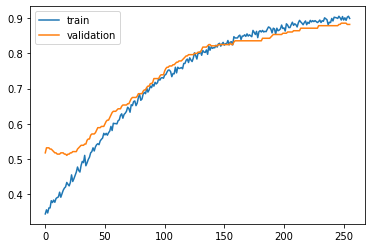

In [17]:
plt.plot(epochs, acc, label="train")
plt.plot(epochs, val_acc, label="validation")
plt.legend()
plt.show()

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']


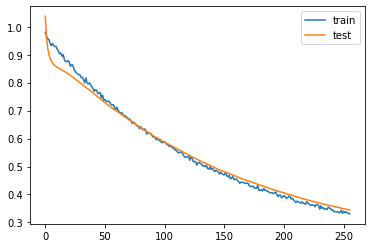

In [19]:
plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="test")
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [21]:
train_pred = convertOneHotToBinary(model.predict(X_train))
y_train_binary = convertOneHotToBinary(y_train)
train_matrix = confusion_matrix(y_train_binary, train_pred)

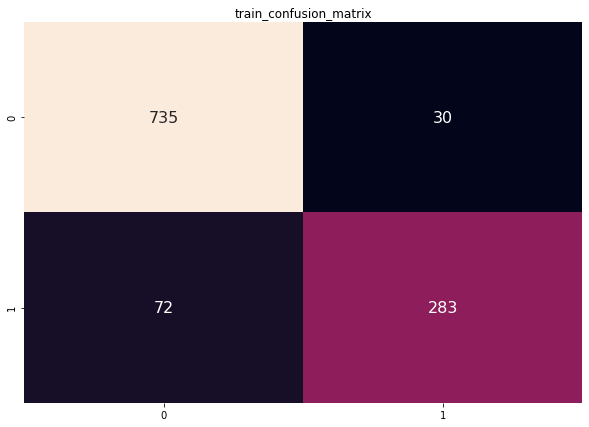

In [22]:
plt.figure(figsize = (10,7))
plt.title("train_confusion_matrix")
plt.xlabel('Predict')
plt.ylabel('True')
train_confusion_matrix = sns.heatmap(train_matrix, 
                                     annot=True, 
                                     cbar=False,annot_kws={"size": 16}, 
                                     fmt="d")
bottom, top = train_confusion_matrix.get_ylim()
train_confusion_matrix.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [23]:
validate_pred = convertOneHotToBinary(model.predict(X_validation))
y_validation_binary = convertOneHotToBinary(y_validation)
validation_matrix = confusion_matrix(y_validation_binary, validate_pred)

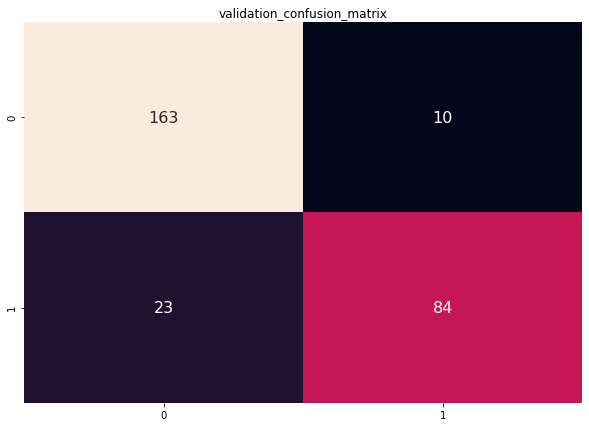

In [24]:
plt.figure(figsize = (10,7))
plt.title("validation_confusion_matrix")
plt.xlabel('Predict')
plt.ylabel('True')
validation_confusion_matrix = sns.heatmap(validation_matrix, 
                                     annot=True, 
                                     cbar=False,annot_kws={"size": 16}, 
                                     fmt="d")
bottom, top = validation_confusion_matrix.get_ylim()
validation_confusion_matrix.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [25]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [26]:
prec_0 = precision_score(y_validation_binary, validate_pred, pos_label=0)
recall_0 = recall_score(y_validation_binary, validate_pred, pos_label=0)
f1_0 = f1_score(y_validation_binary, validate_pred, pos_label=0)

prec_1 = precision_score(y_validation_binary, validate_pred)
recall_1 = recall_score(y_validation_binary, validate_pred)
f1_1 = f1_score(y_validation_binary, validate_pred)

printF1Scores(prec_0, recall_0, f1_0, prec_1, recall_1, f1_1)


class 0
Precision:  0.8763440860215054
Recall:  0.9421965317919075
F1-Score:  0.9080779944289694

class 1
Precision:  0.8936170212765957
Recall:  0.7850467289719626
F1-Score:  0.8358208955223881

Average
Precision:  0.8849805536490505
Recall:  0.8636216303819351
F1-Score:  0.8719494449756788


In [27]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train_binary)

In [28]:
decision_tree_pred = clf.predict(X_validation)

In [29]:
prec_0 = precision_score(y_validation_binary, decision_tree_pred, pos_label=0)
recall_0 = recall_score(y_validation_binary, decision_tree_pred, pos_label=0)
f1_0 = f1_score(y_validation_binary, decision_tree_pred, pos_label=0)

prec_1 = precision_score(y_validation_binary, decision_tree_pred)
recall_1 = recall_score(y_validation_binary, decision_tree_pred)
f1_1 = f1_score(y_validation_binary, decision_tree_pred)

printF1Scores(prec_0, recall_0, f1_0, prec_1, recall_1, f1_1)


class 0
Precision:  1.0
Recall:  0.9942196531791907
F1-Score:  0.9971014492753623

class 1
Precision:  0.9907407407407407
Recall:  1.0
F1-Score:  0.9953488372093023

Average
Precision:  0.9953703703703703
Recall:  0.9971098265895953
F1-Score:  0.9962251432423324


In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
clf_forest = RandomForestClassifier()
clf_forest.fit(X_train, y_train_binary)

C:\Users\TaiT_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
random_forest_pred = clf_forest.predict(X_validation)

In [33]:
prec_0 = precision_score(y_validation_binary, random_forest_pred, pos_label=0)
recall_0 = recall_score(y_validation_binary, random_forest_pred, pos_label=0)
f1_0 = f1_score(y_validation_binary, random_forest_pred, pos_label=0)

prec_1 = precision_score(y_validation_binary, random_forest_pred)
recall_1 = recall_score(y_validation_binary, random_forest_pred)
f1_1 = f1_score(y_validation_binary, random_forest_pred)

printF1Scores(prec_0, recall_0, f1_0, prec_1, recall_1, f1_1)


class 0
Precision:  0.9771428571428571
Recall:  0.9884393063583815
F1-Score:  0.9827586206896551

class 1
Precision:  0.9809523809523809
Recall:  0.9626168224299065
F1-Score:  0.9716981132075471

Average
Precision:  0.9790476190476189
Recall:  0.975528064394144
F1-Score:  0.977228366948601


In [34]:
from sklearn.metrics import roc_curve, auc

In [35]:
fpr, tpr, thresholds = roc_curve(y_validation_binary,validate_pred)
roc_auc = auc(fpr, tpr)

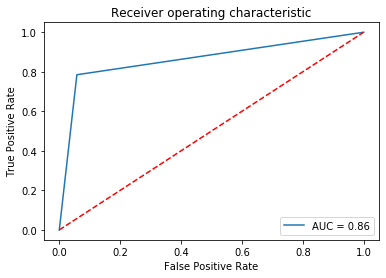

In [36]:
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [37]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from inspect import signature

In [38]:
average_precision = average_precision_score(y_validation_binary
                                            , validate_pred)
precision, recall, _ = precision_recall_curve(y_validation_binary
                                              , validate_pred)

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.78')

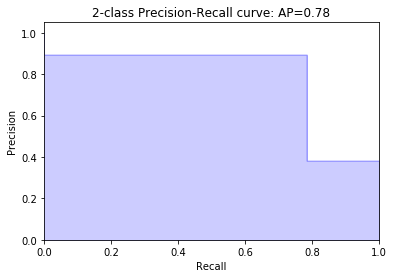

In [39]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))